## Limpieza y transformaciones del dataset

In [49]:
# Importar librerias necesarias

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [42]:
#Cargar el dataset nuevamente

df = pd.read_csv("../Data/AmesHousing.csv")

**Transformación de la variable objetivo**

In [43]:
#Se aplica una transformación logarítmica a la variable objetivo para reducir la asimetría y estabilizar la varianza.

df["SalePrice_log"] = np.log1p(df["SalePrice"])


In [ ]:
#Columnas a eliminar ya que son redundantes para el modelo 
cols_to_drop = [
    "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF",
    "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF"
]

df = df.drop(cols_to_drop, axis=1)

**Se definen las variables X e Y a utlizar**

In [45]:
X = df.drop(["SalePrice", "SalePrice_log"], axis=1)
y = df["SalePrice_log"]


**Se tratan los valores faltantes**

In [56]:
#Lista de variables con nulos
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Yr Blt      159
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
BsmtFin Type 1      80
Bsmt Cond           80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
Garage Area          1
Electrical           1
Total Bsmt SF        1
dtype: int64

## Preprocesamiento y pipeline

**Indentificar columnas numéricas y categóricas**

In [57]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [50]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


Pipeline final

In [51]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


Dividir el dataset en datos de entrenamiento y datos de prueba

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Entrenar el modelo

In [53]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom Abv...
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

Se utilizó un pipeline de scikit-learn que integra el preprocesamiento y el modelo, garantizando que las transformaciones se aprendan únicamente a partir del conjunto de entrenamiento.

In [ ]:
#Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Métricas

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("TRAIN RMSE (log):", rmse_train)
print("TEST RMSE (log):", rmse_test)
print("TRAIN R²:", r2_train)
print("TEST R²:", r2_test)


TRAIN RMSE (log): 0.2406578475663488
TEST RMSE (log): 0.21748122446198812
TRAIN R²: 0.6400666181953969
TEST R²: 0.7443751469709874


El modelo base de regresión lineal alcanza un R² de 0.64 sobre el conjunto de prueba, indicando una capacidad razonable para capturar la variabilidad del precio de las viviendas. La cercanía entre las métricas de entrenamiento y prueba indica una adecuada generalización y ausencia de overfitting.

## Mejoramiento del modelo

Vamos a utilizar Ridge:

Ridge agrega una penalización L2 que:

+ reduce coeficientes inestables

+ maneja mejor multicolinealidad

+ mejora generalización

In [58]:
from sklearn.linear_model import Ridge


In [59]:
ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])


In [60]:
ridge_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom Abv...
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])),
                ('regressor', Ridge())])

In [61]:
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)


In [62]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RIDGE TRAIN RMSE (log):", rmse_train)
print("RIDGE TEST RMSE (log):", rmse_test)
print("RIDGE TRAIN R²:", r2_train)
print("RIDGE TEST R²:", r2_test)


RIDGE TRAIN RMSE (log): 0.38858675925709524
RIDGE TEST RMSE (log): 0.4125083507979838
RIDGE TRAIN R²: 0.06157824471392914
RIDGE TEST R²: 0.08034480961884649


Aunque la regresión Ridge suele mejorar la generalización, en este caso una penalización excesiva condujo a underfitting, reduciendo significativamente la capacidad explicativa del modelo.

## Ahora utilizaremos Lazzo

In [68]:
from sklearn.linear_model import Lasso


In [69]:
lasso_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Lasso(max_iter=10000, random_state=42))
])


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "regressor__alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]
}

grid_lasso = GridSearchCV(
    lasso_model,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)


In [71]:
grid_lasso.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full...
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object'))])),
                                       ('regressor',
                                        Lasso(max_iter=10000,
                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                                              0.5, 1]},
             scoring='neg_mean_squared_error')

In [72]:
best_lasso = grid_lasso.best_estimator_
print("Mejor alpha:", grid_lasso.best_params_)


Mejor alpha: {'regressor__alpha': 0.001}


In [76]:
y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("LASSO TRAIN RMSE (log):", rmse_train)
print("LASSO TEST RMSE (log):", rmse_test)
print("LASSO TRAIN R²:", r2_train)
print("LASSO TEST R²:", r2_test)


LASSO TRAIN RMSE (log): 0.1302960671229784
LASSO TEST RMSE (log): 0.11571793484987468
LASSO TRAIN R²: 0.8944921714470315
LASSO TEST R²: 0.9276296145781626


In [74]:
coef = best_lasso.named_steps["regressor"].coef_
print("Coeficientes distintos de 0:", np.sum(coef != 0))


Coeficientes distintos de 0: 79


El modelo Lasso con regularización L1 mostró el mejor desempeño entre los modelos evaluados.
Presentó un alto poder explicativo (R² ≈ 0.92) y un error bajo y consistente entre entrenamiento y prueba, indicando una adecuada capacidad de generalización.
Además, permitió reducir el número de variables relevantes, eliminando coeficientes irrelevantes y mejorando la interpretabilidad del modelo.

Predicción sobre el conjunto TEST

In [77]:
# Predicción en escala log
y_test_pred_log = model.predict(X_test)

# Volver a escala real ($)
y_test_pred = np.expm1(y_test_pred_log)

# Valores reales
y_test_real = np.expm1(y_test)


In [78]:
pd.DataFrame({
    "Precio real": y_test_real[:10],
    "Precio predicho": y_test_pred[:10]
})


,Precio real,Precio predicho
1357,161000.0,140643.156559
2367,116000.0,122017.053980
2822,196500.0,167819.711812
2126,123600.0,116830.276877
1544,126000.0,112385.616516
2415,174190.0,175911.784158
2227,200000.0,128725.853988
410,148500.0,156704.044606
761,88750.0,93264.812430
436,409900.0,306220.045003


In [ ]:
#Predicción ejemplo 
df_new_house = X.iloc[[0]]  

pred_log = model.predict(df_new_house)
pred_price = np.expm1(pred_log)

pred_price


array([188833.49656439])

In [81]:
df["Predicted_Price"] = np.expm1(model.predict(X))


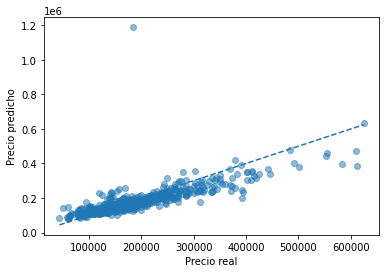

In [82]:
import matplotlib.pyplot as plt

plt.scatter(y_test_real, y_test_pred, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()],
         linestyle="--")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()
